# Homework Assignment #1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Section 1: Police Killings

In [15]:
killings = pd.read_csv('../data/police-killings.csv', index_col=[0])
killings.head()

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,lawenforcementagency,cause,armed,county_income
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


### 1. Make the following changes to column names:

- Rename "lawenforcementagency" to "agency"
- Rename "raceethnicity" to "race"

In [205]:
killings.rename(columns={'lawenforcementagency':'agency', 'raceethnicity':'race'}, inplace='True')
killings

,name,age,gender,race,month,day,year,streetaddress,city,state,agency,cause,armed,county_income
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669
5,Adam Reinhart,29,Male,White,March,7,2015,18th St and Palm Ln,Phoenix,AZ,Phoenix Police Department,Gunshot,No,53596
6,Adrian Hernandez,22,Male,Hispanic/Latino,March,27,2015,4000 Union Ave,Bakersfield,CA,Bakersfield Police Department,Gunshot,Firearm,48552
7,Adrian Solis,35,Male,Hispanic/Latino,March,26,2015,1500 Bayview Ave,Wilmington,CA,Los Angeles Police Department,Gunshot,Non-lethal firearm,55909
8,Alan Alverson,44,Male,White,January,28,2015,Pickett Runn Rd,Sunset,TX,Wise County Sheriff's Department and Texas DPS,Gunshot,Firearm,38310
9,Alan James,31,Male,White,February,7,2015,200 Abbie St SE,Wyoming,MI,Kentwood Police Department and Wyoming DPS,Gunshot,Other,51667


### 2. Show the count of missing values in each column

In [45]:
killings.isnull().sum()

name                    0
age                     0
gender                  0
raceethnicity           0
month                   0
day                     0
year                    0
streetaddress           4
city                    0
state                   0
lawenforcementagency    0
cause                   0
armed                   0
county_income           0
dtype: int64

### 3. Replace each null/missing value in the dataframe with the string "unknown"

In [51]:
killings.fillna('unknown', inplace=True)

# After replacing the Null Values with Unknown

In [53]:
killings.isnull().sum()

name                    0
age                     0
gender                  0
raceethnicity           0
month                   0
day                     0
year                    0
streetaddress           0
city                    0
state                   0
lawenforcementagency    0
cause                   0
armed                   0
county_income           0
dtype: int64

### 4. How many killings were there in March and April?

In [153]:
killingsbymonth = pd.DataFrame(killings.groupby('month').month.count())
killingsbymonth.rename(columns={'month':'killings'}, inplace=True)
killingsbymonth.loc[['March','April']]

,killings
month,
March,114
April,96


### 5. How many male and how many female victims are there?

In [156]:
pd.DataFrame(killings.groupby('gender').gender.count())

,gender
gender,
Female,22
Male,445


### 6. How many killings were of unarmed people?

In [162]:
(killings.armed == 'No').sum()

102

### 7. What percentage of all killings were unarmed?

In [188]:
((killings.armed == 'No').sum()) * 100 / (killings.name.count())

21

### 8. What are the 5 states with the most killings?

In [199]:
killings.groupby('state').state.count().sort_values(ascending=False).head()

state
CA    74
TX    46
FL    29
AZ    25
OK    22
Name: state, dtype: int64

### 9. Show a value counts of deaths for each race

In [209]:
killings.groupby('race').race.count().sort_values(ascending=False)

race
White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: race, dtype: int64

### 10. Display a histogram of ages of all killings

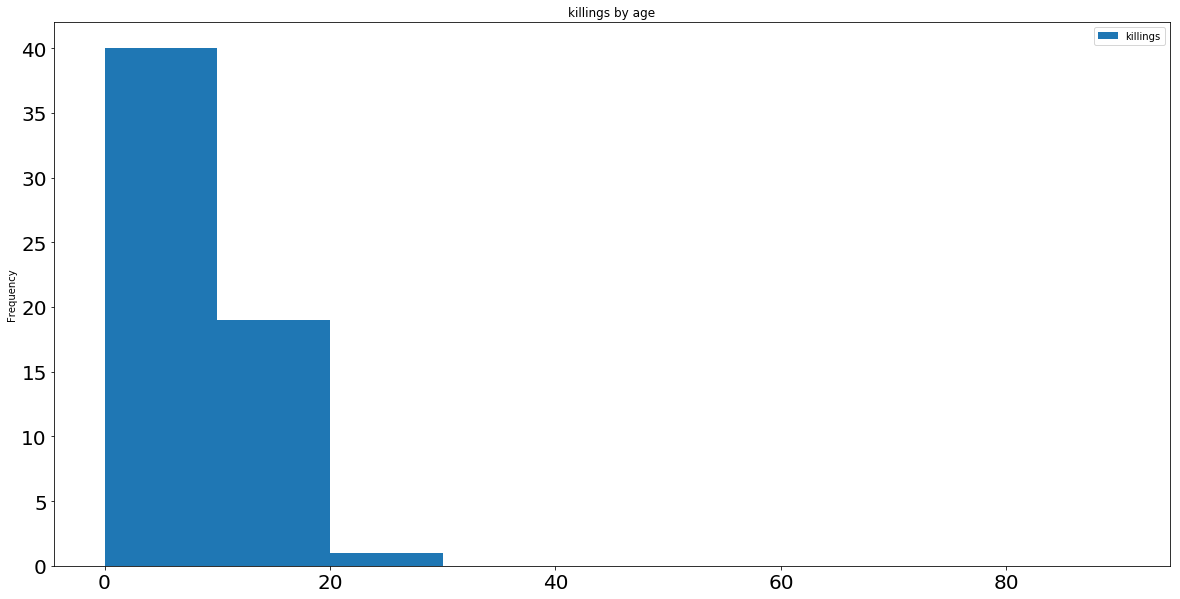

In [237]:
killingsbyage = pd.DataFrame(killings.groupby('age').age.count())
killingsbyage.rename(columns={'age':'killings'}, inplace='True')
killingsbyage.plot(kind='hist', figsize=(20, 10), 
                   fontsize=(20), bins=[0, 10, 20, 30, 
                                        40, 50, 60, 70,
                                        80, 90], title='killings by age')

### 11. Show histogram of ages for each race

In [377]:
#Cant Figure this one out. Unable to assign the X and Y Axis
killingsbyage_race.head()

,race,age
0,Asian/Pacific Islander,40.800000
1,Black,34.044444
2,Hispanic/Latino,31.716418
3,Native American,27.750000
4,Unknown,43.533333


In [378]:
killingsbyage_race = pd.DataFrame(killings.groupby('race').age.mean())
killingsbyage_race.reset_index(inplace=True)

TypeError: cannot convert the series to <type 'float'>

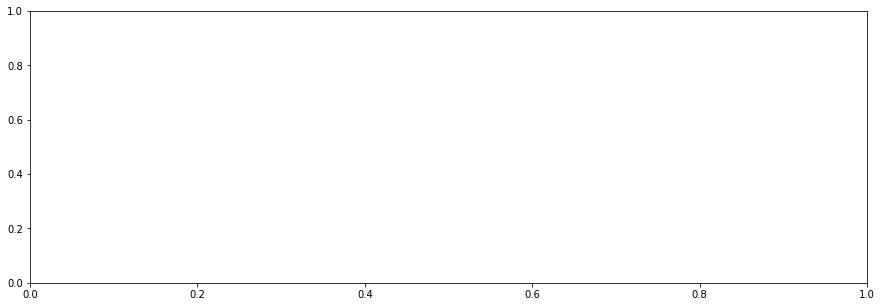

In [386]:
x = [killingsbyage_race.race]
y = [killingsbyage_race.age]
plt.figure(figsize=(15, 5))
w=0.4
plt.bar(left=y, width=w, height=x, tick_label=x)

### 12. What is the average age of death by race?

In [300]:
pd.DataFrame(killings.groupby('race').age.mean())

,age
race,
Asian/Pacific Islander,40.800000
Black,34.044444
Hispanic/Latino,31.716418
Native American,27.750000
Unknown,43.533333
White,40.466102


### 13. Show a bar chart with counts of deaths every month

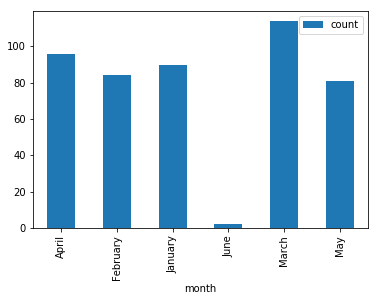

In [313]:
deathsbymonth = pd.DataFrame(killings.groupby('month').month.count())
deathsbymonth.rename(columns={'month':'count'}, inplace=True)
deathsbymonth.plot(kind='bar')

## Section 2: College Majors

In [314]:
majors = pd.read_csv('../data/college-majors.csv', index_col=[0])
majors.head()

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0


### 1. Delete the columns (employed_full_time_year_round, major_code)


In [319]:
majors.drop(['Employed_full_time_year_round', 'Major_code'], axis=1, inplace=True)
majors.head()

,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th
0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000.0
1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000.0
2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000.0
3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000.0
4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000.0


### 2. Show the count of missing values in each column

In [320]:
majors.isnull().sum()

Major                0
Major_category       0
Total                0
Employed             0
Unemployed           0
Unemployment_rate    0
Median               0
P25th                0
P75th                0
dtype: int64

### 3. What are the top 10 highest paying majors?

In [362]:
highestpaying = pd.DataFrame(majors[['Major','Unemployment_rate']]).sort_values('Unemployment_rate').head(10)
highestpaying

,Major,Unemployment_rate
26,EDUCATIONAL ADMINISTRATION AND SUPERVISION,0.000000
51,GEOLOGICAL AND GEOPHYSICAL ENGINEERING,0.000000
85,PHARMACOLOGY,0.016111
111,MATERIALS SCIENCE,0.022333
97,MATHEMATICS AND COMPUTER SCIENCE,0.024900
0,GENERAL AGRICULTURE,0.026147
155,TREATMENT THERAPY PROFESSIONS,0.026292
153,NURSING,0.026797
1,AGRICULTURE PRODUCTION AND MANAGEMENT,0.028636
2,AGRICULTURAL ECONOMICS,0.030248


### 4. Plot the data from the last question in a bar chart, include proper title, and labels


TypeError: unsupported operand type(s) for -: 'str' and 'float'

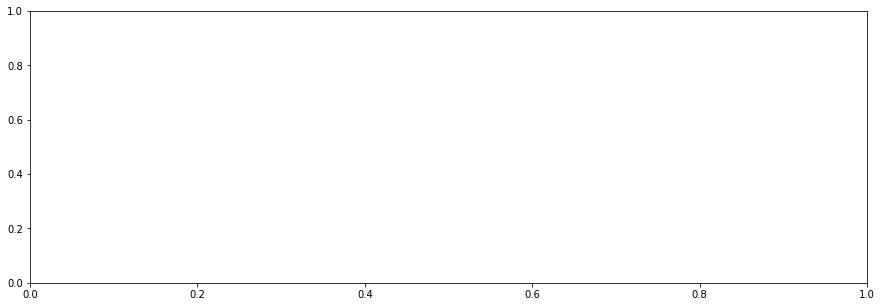

In [388]:
plt.figure(figsize=(15,5))
plt.bar(left=highestpaying.Major, width=0.04, height=highestpaying.Unemployment_rate, tick_label=highestpaying.Major)
plt.show()

In [393]:
highestpaying['Major'].plot.bar

<bound method SeriesPlotMethods.bar of <pandas.plotting._core.SeriesPlotMethods object at 0x0000000012D119B0>>

### 5. What is the average median salary for each major category?

### 6. Visualize only the top 5 paying major categories

### 7. Plot a histogram of the distribution of median salaries

### 8. Plot a histogram of the distribution of median salaries by major category

### 9. What are the top 10 most UNemployed majors?

### 10. What are the top 10 most UNemployed majors CATEGORIES? Use the mean for each category

## Section 3: FIFA Soccer Game data

In [ ]:
fifa = pd.read_csv('../data/fifa_data.csv')
fifa.head()

### 1. Clean up the dataset.

    - Lowercase the column names
    - Set the "name" column as the index
    - Drop the following columns "national_position", "national_kit", "club_kit", "club_joining", and "contract_expiry"
    - Get rid of all players who are goalkeepers and drop every column that starts with GK
    - Drop every player whose rating is less than 70
    - Convert the "height" and "weight" columns to float types
    - Check to see if there any nulls, if so drop them from the dataset

### 2.  Who are the top five players of the following attributes: speed, marking, and finishing

### 3. Who is the tallest French lefted foot player?

### 4. Show a pandas series of every attribute's correlation with the rating attribute

### 5. Make a heatmap of the dataset's correlation table

### 6. Return a dataframe with only players from the following clubs. Call the dataframe fifa2. From now on we'll be using fifa2

In [ ]:
clubs_list = ['Real Madrid', 'FC Barcelona', 'FC Bayern', 'Manchester Utd',
              'Chelsea', 'Arsenal', 'Juventus', 'PSG', 'Manchester City',
              'Bor. Dortmund', 'Liverpool', 'Roma']

### 7. Make a bar plot of the average long_shots, curve, and dribbling attributes of the clubs in the data

### 8. Make a scatter plot of short_pass vs marking and use the preffered_foot column to color-encode the dots.